<a href="https://colab.research.google.com/github/orifortigaliyev/Data-Science-Practice/blob/main/Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/Валовой внутренний продукт на душу населения в локации Узбекистан.csv')

In [8]:
df_gdp = df[['Variable observation date', 'Variable observation value']].copy()
df_gdp.columns = ['Year', 'Value']

In [9]:
df_gdp

,Year,Value
0,1987,450.244536
1,1988,550.999615
2,1989,598.123132
3,1990,652.937653
4,1991,658.313551
5,1992,602.920526
6,1993,595.777481
7,1994,574.229080
8,1995,582.542137
9,1996,597.332287


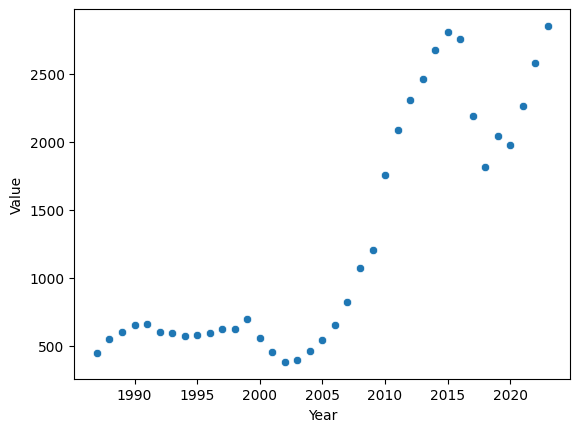

In [10]:
sns.scatterplot(data=df_gdp, x='Year', y='Value')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [12]:
x = np.asanyarray(df_gdp[['Year']])
y = np.asanyarray(df_gdp[['Value']])

In [13]:
linear_model.fit(x,y)


LinearRegression()

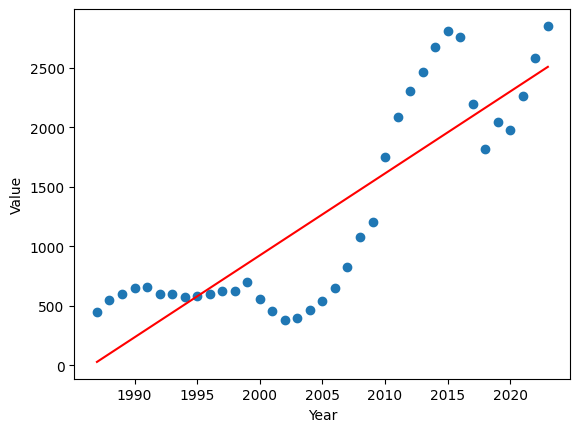

In [14]:
plt.plot(x, y, 'o')
plt.plot(x, linear_model.predict(x), '-r')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

In [15]:
y_pred = linear_model.predict(x)

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
mean_absolute_error(y_pred, y)

390.60488745474083

In [18]:
from sklearn.preprocessing import PolynomialFeatures
model_poly = PolynomialFeatures(degree=2, include_bias=False)
model_poly.fit_transform(x)
x_poly = model_poly.fit_transform(x)

In [19]:
x_poly[0]

array([1.987000e+03, 3.948169e+06])

In [20]:
linear_model.fit(x_poly, y)

LinearRegression()

In [21]:
yhat = linear_model.predict(x_poly)

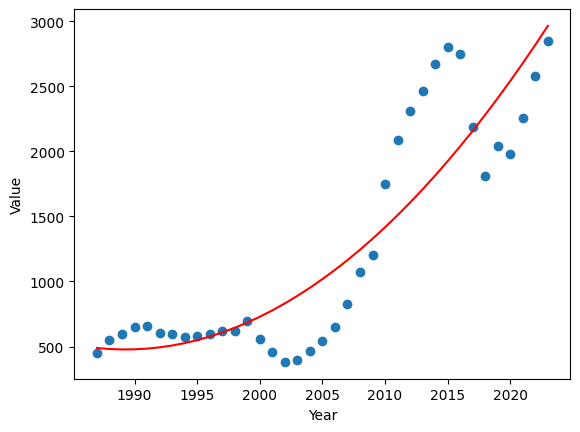

In [22]:
plt.plot(x, y, 'o')
plt.plot(x, yhat, '-r')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

In [23]:
mean_absolute_error(yhat, y)

309.19915765337396

In [24]:
from sklearn.metrics import r2_score
r2_score(yhat, y)

0.7267537204818557

In [25]:
next_year = np.array([[2024]])
predicted_value = linear_model.predict(model_poly.fit_transform(next_year))

print(f"2024 yil uchun bashorat qilingan qiymat: {predicted_value[0][0]:.2f}")


2024 yil uchun bashorat qilingan qiymat: 3115.23
